## Descriptive: What is happening?

## Diagnostic: Why is it happening?

In [1]:
import pandas as pd

## Load data from excel file

In [2]:
df = pd.read_excel('../data/Production Data Versaline.xlsx')
print(df.columns)
df.head(2)

Index(['Date', 'Product', 'Planned start Time', 'Actual Start Time',
       'Stop Time', 'Total time', 'Startup Delay',
       'Breakdowns and other delays', 'Effective production time',
       'Operating Speed', 'Produced Qty', 'Rejects Qty', 'Mix Usage',
       'Mix Wastage', 'Mix yield', 'AR', 'PR', 'QR', 'OEE', 'Mix Per Stick',
       'Efficiency', 'Planned Qty'],
      dtype='object')


,Date,Product,Planned start Time,Actual Start Time,Stop Time,Total time,Startup Delay,Breakdowns and other delays,Effective production time,Operating Speed,...,Mix Usage,Mix Wastage,Mix yield,AR,PR,QR,OEE,Mix Per Stick,Efficiency,Planned Qty
0,2018-07-02,WB Chocolate,06:30:00,10:30:00,20:30:00,14.0,4.0,5.15,4.85,28880,...,7840.0,991.000,0.873597,0.346429,1.496754,0.873597,0.452976,0.0375,0.499675,NaN
1,2018-07-04,WB Vanilla,06:00:00,18:30:00,20:00:00,14.0,12.5,0.00,1.50,28880,...,1160.0,40.625,0.964978,0.107143,0.716049,0.964978,0.074033,0.0375,0.098710,NaN


### Calculate Rejects percentage and add as a colomn

Rejects percentage = Rejects Qty / Total Qty

In [3]:
# Add rejects percentage

def get_rejects_percentage(row):
    return row["Rejects Qty"]/row["Produced Qty"]

df['Rejects Pct'] = df.apply (lambda row: get_rejects_percentage(row), axis=1)
# df.info()

In [4]:
# df2 = pd.read_excel('../data/Production Data Flexline.xlsx', sheet_name=1)
# print(df2.columns)
# df2.head(2)


AR - Avaliability Rate

PR - Perfromance Rate

QR - Quality Rate

OEE - Overall Equipment Efficiency (AR * PR * QR)

Product |
production Qty |
Breakdown time |
Rejects percentage |

## Select only the useful features
remove duplicate features such as start time and end time

In [5]:
useful_colomns = ["Product", "Startup Delay", "Breakdowns and other delays", "Effective production time", "Rejects Pct", "Mix Usage", "Mix Wastage", "Mix yield", "OEE"]
df = df[useful_colomns]
df = df.rename(columns={"Breakdowns and other delays": "BD & other", "Effective production time": "Eff P time"})
df.head(2)

,Product,Startup Delay,BD & other,Eff P time,Rejects Pct,Mix Usage,Mix Wastage,Mix yield,OEE
0,WB Chocolate,4.0,5.15,4.85,0.144693,7840.0,991.000,0.873597,0.452976
1,WB Vanilla,12.5,0.00,1.50,0.036293,1160.0,40.625,0.964978,0.074033


In [6]:
df.Product.unique()

array(['WB Chocolate', 'WB Vanilla', 'JJ Necto', 'MM Watermelon',
       'MM Orange', 'WB Chock Shock', 'WB Berry', '2-Bar Vanilla Faluda',
       'JJ Cream Soda', 'JJ Orange Crush ', 'Ice Cake', 'Bubble Gumy',
       'JJ Creamsoda', 'WB Vnilla', 'Bubble Gummy', 'Ice cake',
       'WB Chocok Shock', 'JJ Orange Crush'], dtype=object)

## Rename Duplicates products with the correct name

In [7]:
df = df.replace({'Product': {"JJ Orange Crush ": "JJ Orange Crush", 
                             "WB Chocok Shock": "WB Chock Shock",
                            "Ice cake": "Ice Cake",
                            "Bubble Gumy":"Bubble Gummy", 
                            "WB Vnilla": "WB Vanilla",
                            "JJ Creamsoda": "JJ Cream Soda"}})
for product in df.Product.unique():
    print("{:15} = {}".format(product, df[df["Product"] == product]["Product"].count()))

WB Chocolate    = 62
WB Vanilla      = 74
JJ Necto        = 45
MM Watermelon   = 51
MM Orange       = 65
WB Chock Shock  = 30
WB Berry        = 16
2-Bar Vanilla Faluda = 65
JJ Cream Soda   = 15
JJ Orange Crush = 8
Ice Cake        = 5
Bubble Gummy    = 5


In [8]:
print("Number of rows: {}".format(df.Product.count()))
df.info()

Number of rows: 441
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        441 non-null    object 
 1   Startup Delay  441 non-null    float64
 2   BD & other     441 non-null    float64
 3   Eff P time     441 non-null    float64
 4   Rejects Pct    440 non-null    float64
 5   Mix Usage      441 non-null    float64
 6   Mix Wastage    441 non-null    float64
 7   Mix yield      439 non-null    float64
 8   OEE            441 non-null    float64
dtypes: float64(8), object(1)
memory usage: 31.1+ KB


## Fill the NAN values with the mean of the colomn

In [11]:
df["Rejects Pct"] = df["Rejects Pct"].fillna(df["Rejects Pct"].mean())
df["Mix yield"] = df["Mix yield"].fillna(df["Mix yield"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        441 non-null    object 
 1   Startup Delay  441 non-null    float64
 2   BD & other     441 non-null    float64
 3   Eff P time     441 non-null    float64
 4   Rejects Pct    441 non-null    float64
 5   Mix Usage      441 non-null    float64
 6   Mix Wastage    441 non-null    float64
 7   Mix yield      441 non-null    float64
 8   OEE            441 non-null    float64
dtypes: float64(8), object(1)
memory usage: 31.1+ KB


In [10]:
group_by_products = df.groupby(by=['Product'])
product_data_avg = group_by_products.mean()
product_data_count = group_by_products.count()
# print(product_data_avg)
# print(product_data_count)

## Some plots using seaboarn
https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
    

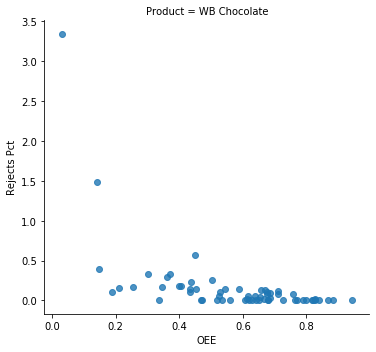

In [12]:
import seaborn as sns
%matplotlib inline

filtered_class = df[df['Product'] == 'WB Chocolate']
sns.lmplot("OEE", "Rejects Pct", data=filtered_class, fit_reg=False, col='Product', col_wrap=2)

frames = [df[df["Mix yield"].isna()], df[df["Rejects Qty"].isna()]]
pd.concat(frames)

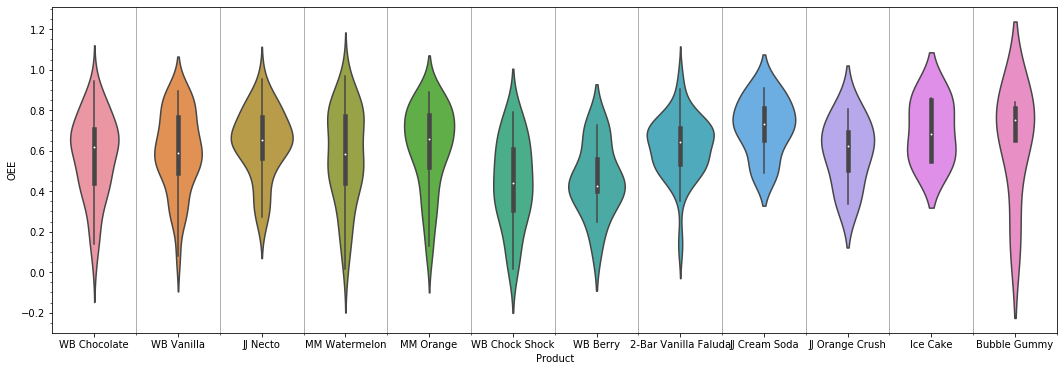

In [13]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,6))

ax1 = sns.violinplot('Product', "OEE", data=df)


ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

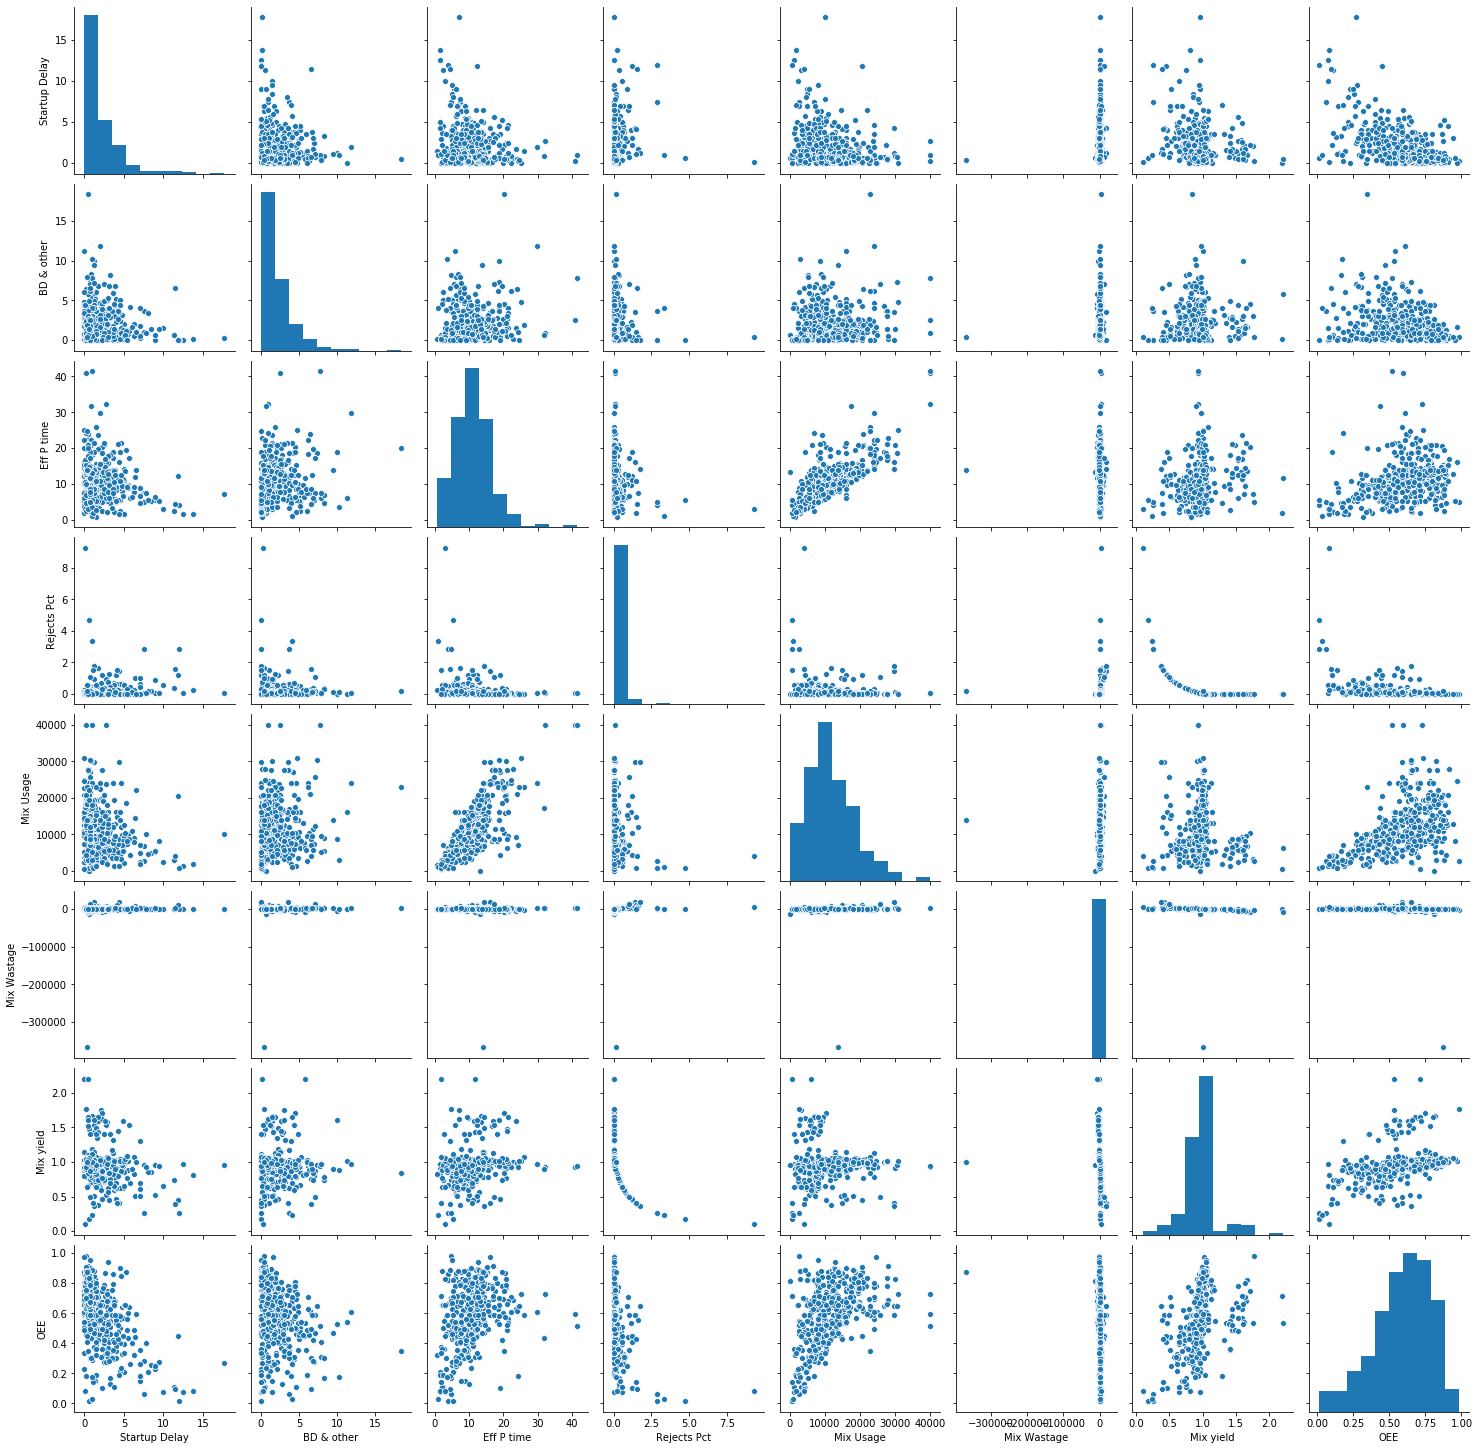

In [14]:
sns.pairplot(df.loc[:,df.dtypes == 'float64'])

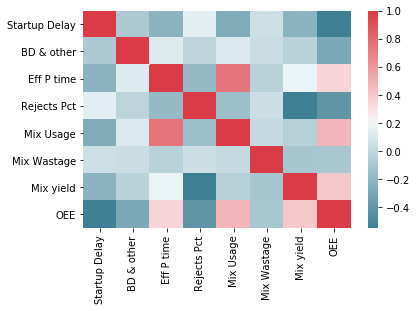

In [15]:
corr = df.loc[:,df.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [16]:
for col in df.columns.values:
    print("{:20} = {}".format(col, df[col].nunique()))

Product              = 12
Startup Delay        = 130
BD & other           = 261
Eff P time           = 386
Rejects Pct          = 301
Mix Usage            = 253
Mix Wastage          = 435
Mix yield            = 439
OEE                  = 439


# sudo apt install python3-pip

/home/dulanj/Environments/py376/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


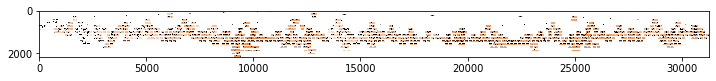

In [22]:
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()
plot_colomns = ["Total time", "Breakdowns and other delays", "Effective production time", "Produced Qty", "Rejects Qty", "Mix Usage", "Mix Wastage", "Mix yield"]

export_graphviz(regressor, out_file=dot_data, feature_names=plot_colomns, class_names=["Efficiency"], rounded=True, filled=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(12,12))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

In [23]:
import numpy as np
print(np.min(df["Efficiency"]))
print(np.max(df["Efficiency"]))
print(np.average(df["Efficiency"]))
print(np.var(df["Efficiency"]))

0.0144463293667572
1.08422471300031
0.6174142201712173
0.041447896769146904


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2315a146d0>]],
      dtype=object)

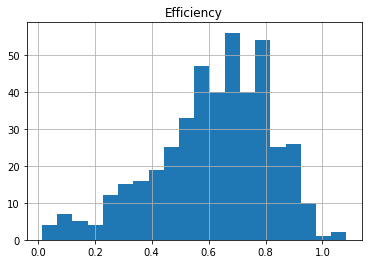

In [24]:
df.hist(bins=20, column="Efficiency")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23191069d0>,
      dtype=object)

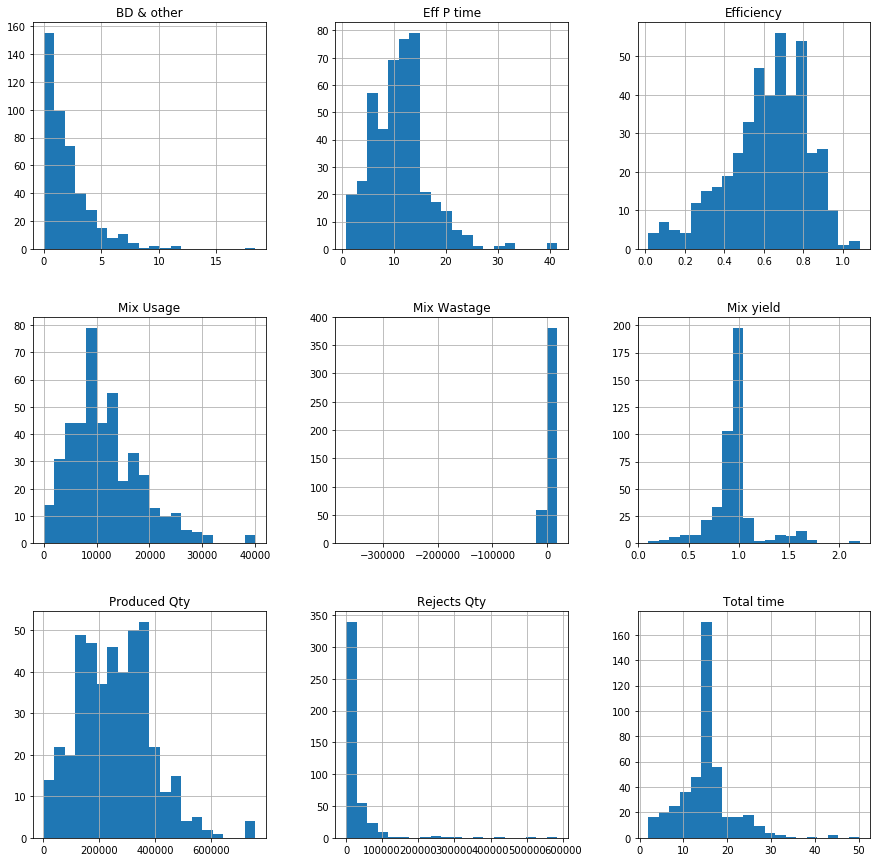

In [25]:
df.hist(bins=20, figsize=(15,15))